# Decision Trees
Supervised Learning Algorithm that breaks decisions up into a tree structure, roughly reflecting human decision making. 

In [11]:
'''Loading the Dataset & Making imports'''
from sklearn.datasets import load_wine
# All imports needed
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dataset = load_wine()
X = dataset['data']
y = dataset['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

## Decision Tree Parameters
For Decision Tree, there are a couple of important parameters.
##### General Parameters
- **criterion**: Determines the function that measures the quality of the split
    - **gini**: Gini Impurity (Default)
    - **entrophy**: Information gain using entropy
##### Tree Growth Parameters
- **max_depth**: The maximum depth of the tree. Prevent overfitting by limiting depth. (Default=None)
- **min_samples_split**: The mimimum number of samples required to split a node (default=2). Larger values will make the tree more conservative with fewer splits. *Typically good to keep at 2.*
- **min_samples_leaf**: The mimum number of samples required to be a lead node (default=1). Useful to prevent overfitting.

Everything else is pretty insignificant, can be found on scikit learn's website.


In [12]:
params = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [25, 50, 75, 100, None],  # In real world, would be refined later
    "min_samples_split": [i for i in range(2, 8)],
    "min_samples_leaf": [j for j in range(1, 5)]
}

### Creating The Model & Testing Parameters

In [ ]:
''' Optimizing Parameters '''
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, params, n_jobs=-1, cv=4)
grid_search.fit(X, y)

print("Best Parameters: ", grid_search.best_params_)
print("\tScore: ", grid_search.best_score_)


In [ ]:
''' Independent Test '''
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dt_ = DecisionTreeClassifier(criterion='entropy')
dt_.fit(x_train, y_train)
y_pred = dt_.predict(x_test)

# Printing important metrics/evaluations
print("Score: ", dt_.score(x_train, y_train))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

### Creating DT Visual

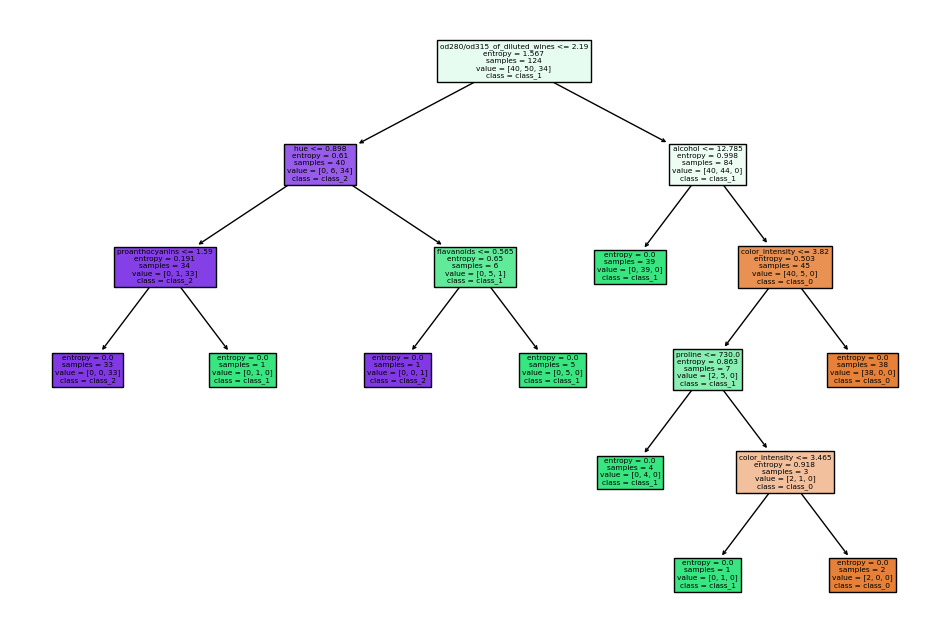

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_, filled=True, feature_names=dataset.feature_names, class_names=dataset.target_names)
plt.show()